The zygotes of one generation get formed from a subsapling of gametes from the parental population. But that subsample invitably is an imperfect representation of the alleles found in the parental population. This sampling error results in chance fluctuations in allele frequency across generations, known as genetic drift.

Genetic drift is one of the five forces that can cause evolutionary change - The loss versus fixation of an allele can caused by genetic drift. Quantitatively we can think of the drawing of two alternative alleles in gametes as Bernoulli binomial sampling, so the expected change in allele frequency p corresponds to the variance of the binomial distribution.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [8]:
#parameter 
N = 5 # population size
replicate_population = 10 #number of replication simulations
p = 0.5 #starting_allele_frequency of selectively neutral allele A
ngen = 30 #number of generation

In [11]:
def drift_sim(N, p, ngen): 
    f_init = p #record the initial allele frequency
    fvec = [p] #store the allele frequency over time
    f_A = p 
    for _ in range(ngen-1):
        A = np.random.binomial(2*N, f_A) 
        f_A = A / (2*N)
        fvec.append(f_A)
    # create a list of allele frequency p over time
    f_over_time = [f_init] + fvec
    # write out
    return f_over_time

## Visualization 
The graph shows a simulation in which genetic drift can act. You can adjust how many populations are plotted, the strength of genetic drift (changing the population size).

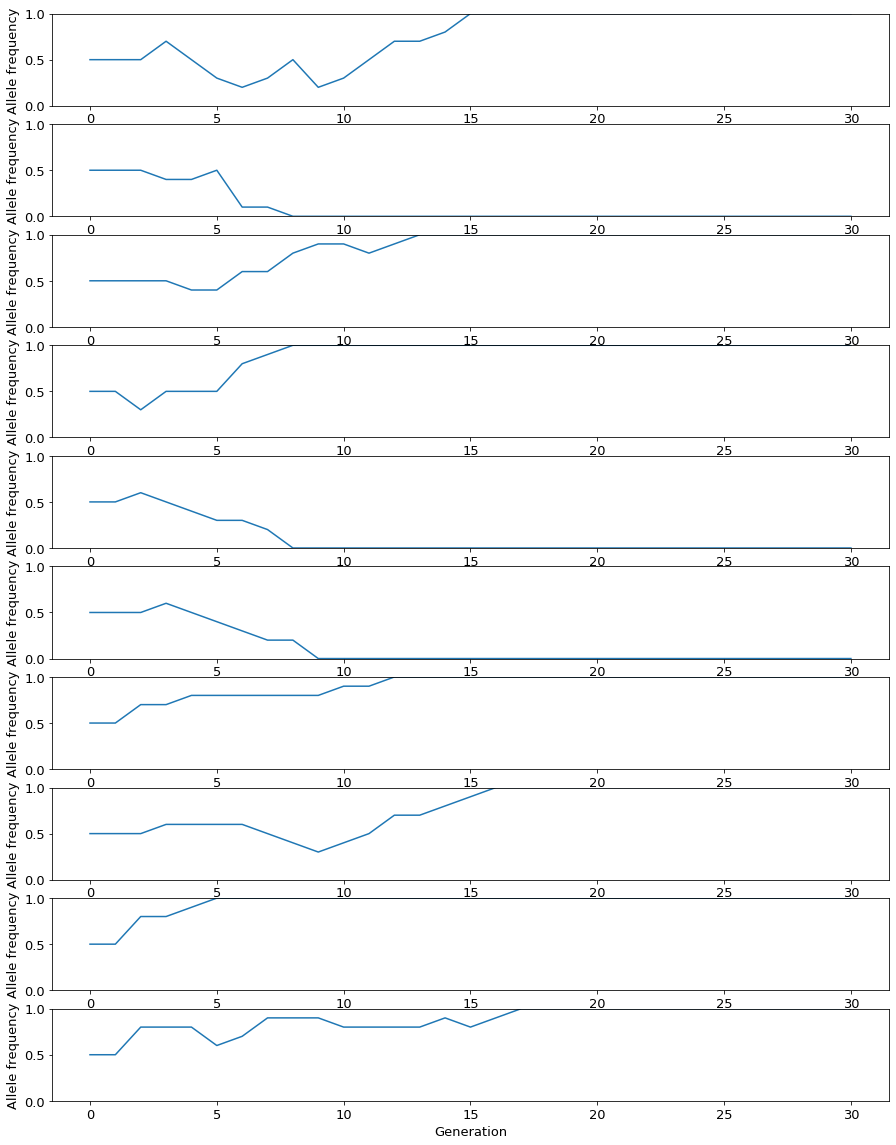

In [12]:
matplotlib.rc('font', size=13)
fig, ax = plt.subplots(replicate_population, figsize = (15,20))

for i in range(replicate_population):
    ax[i].plot(np.linspace(0, ngen, ngen+1), drift_sim(N=N, p=p, ngen=ngen))
    ax[i].set(xlabel="Generation", ylabel="Allele frequency")
    ax[i].set_ylim([0, 1])